## Market Segmentation

Using the McDonald's dataset from [Market Segmentation Analysis](http://www.marketsegmentationanalysis.org/).

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('assets/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [31]:
df.isnull().any()

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool

__Conclusion__: A clean dataset with evenly distributed features.

In [32]:
sns.set_style('darkgrid')

### Step 1: Deciding to Segment
McDonald's can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald's can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.

### Step 2: Ideal Target Segment

The likelihood of eating at McDonald's and the frequency of eating there would be best target segment.

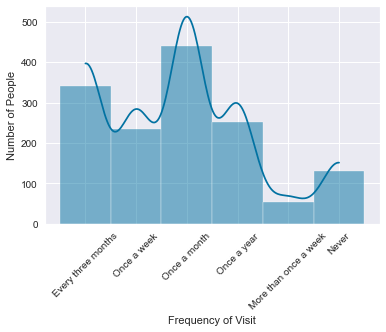

In [33]:
sns.histplot(df, x="VisitFrequency", kde=True)
plt.xlabel("Frequency of Visit")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.show()

- Majority of demographic surveyed have regular interest in McDonalds.
- Very few people consume visit more than once within a month.

### Step 3: Data Identification

The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald's with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald's possesses this attribute), or a NO response (indicating that McDonald's does not possess this attribute).

In addition, respondents indicated their AGE and GENDER. Had this data been
collected for a real market segmentation study, additional information - such as
details about their dining out behaviour, and their use of information channels -
would have been collected to enable the development of a richer and more detailed
description of each market segment.

### Step 4: Exploring and Cleaning Data

In [34]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [35]:
df.yummy.value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

Replacing `Yes` with `1` and `No` with `0`.

In [36]:
df.replace(['Yes','No'],[1,0],inplace=True)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


Changing datatype in Like

In [37]:
df.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

Normalizing Likeness by transforming from [-5, +5] to [0, 10].

In [38]:
df.Like = df.Like.replace(['I hate it!-5','I love it!+5'],['-5','+5']).astype('int64') + 5
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,2,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,7,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,6,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,9,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,7,49,Once a month,Male


__Principal Components Analysis__

Creating PCA which can further be used to create a perceptual map.

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
# Excluding Non Binary elements
transformed_data = pca.fit_transform(df.iloc[:, :-4])

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [41]:
comps = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(11)], index=df.columns[:-4])
comps

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


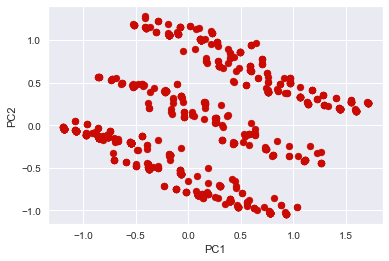

In [42]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Step 5: Extracting Clusters using _k_-Means Cluster
and
### Step 6: Profiling Segments

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(13), object(2)
memory usage: 170.4+ KB


In [44]:
df_bin = df.iloc[:, :11]
df_bin

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


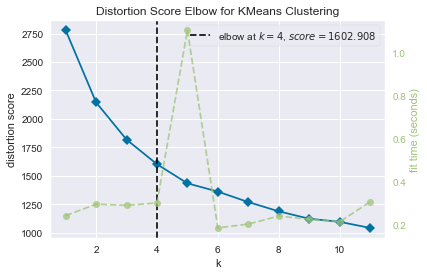

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

vis = KElbowVisualizer(kmeans, k=(1, 12)).fit(df_bin)
vis.show()

In [46]:
kmeans = KMeans(4, init='k-means++', random_state=42).fit(df_bin)
df['cluster_number'] = kmeans.labels_

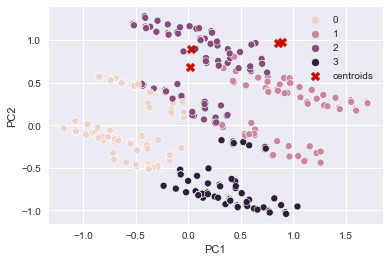

In [47]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
x = df_bin.values
pca_data = preprocessing.scale(x)
pca = PCA(n_components=11)
pc = pca.fit_transform(x)

pf = pd.DataFrame(data=pc, columns=[f"PC{i+1}" for i in range(11)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()

### Step 7: Describing Segments

In [48]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Like Crosstab
cross = pd.crosstab(df['cluster_number'], df['Like'])
cross = cross[list(np.arange(10) + 1)]
cross

Like,1,2,3,4,5,6,7,8,9,10
cluster_number,,,,,,,,,,
0,4,2,6,13,43,65,90,143,111,99
1,28,30,19,13,39,14,6,8,0,0
2,3,7,6,7,36,42,60,66,47,44
3,36,34,28,25,51,31,31,12,2,0


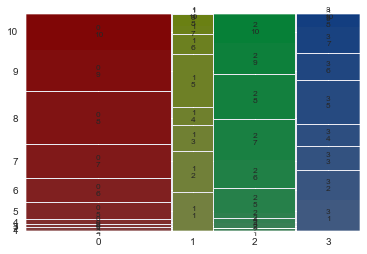

In [49]:
mosaic(cross.stack())
plt.show()

In [50]:
# Gender Crosstab
cross_gender = pd.crosstab(df['cluster_number'], df['Gender'])
cross_gender

Gender,Female,Male
cluster_number,,
0,349,231
1,106,140
2,154,169
3,179,125


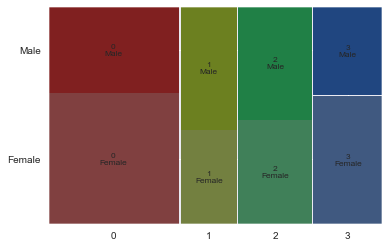

In [51]:
mosaic(cross_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_number', ylabel='Age'>

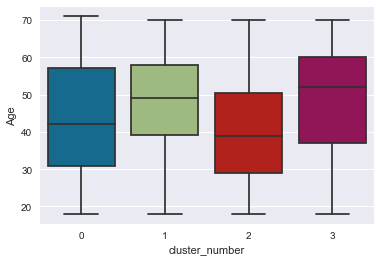

In [52]:
sns.boxplot(x='cluster_number', y='Age', data=df)

### Step 8: Selecting Target Segment

In [53]:
from sklearn.preprocessing import LabelEncoder

df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_number')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_number,VisitFrequency
0,0,2.584483
1,1,2.654472
2,2,2.547988
3,3,2.822368


In [55]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_number')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_number,Like
0,0,7.665517
1,1,2.365854
2,2,7.139319
3,3,3.486842


In [56]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_number')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_number,Gender
0,0,0.398276
1,1,0.569106
2,2,0.523220
3,3,0.411184


In [57]:
segment = Gender.merge(Like, on='cluster_number', how='left').merge(visit, on='cluster_number', how='left')
segment

,cluster_number,Gender,Like,VisitFrequency
0,0,0.398276,7.665517,2.584483
1,1,0.569106,2.365854,2.654472
2,2,0.523220,7.139319,2.547988
3,3,0.411184,3.486842,2.822368


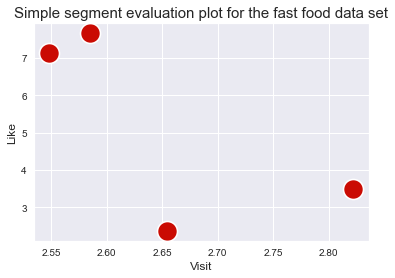

In [58]:
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

### Step 9: Market Mix Customization

In Step 9 the marketing mix is designed. If, for example, McDonald's managers
decide to focus on segment 3 (young customers who like McDonald's, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald's
range of products. To not cannibalise the main range, the product features of the
MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by
members of segment 3 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same
given that all McDonald's food is sold in McDonald's outlets. But McDonald's
management could consider having a MCSUPERBUDGET lane where the wait in the
queue might be slightly longer in an attempt not to cannibalise the main product line.

### Step 10: Evaluation and Monitoring

After the market segmentation analysis is completed, and all strategic and tactical
marketing activities have been undertaken, the success of the market segmentation
strategy has to be evaluated, and the market must be carefully monitored on a
continuous basis. It is possible, for example, that members of segment 3 start earning
more money and the MCSUPERBUDGET line is no longer suitable for them. Changes
can occur within existing market segments. But changes can also occur in the
larger marketplace, for example, if new competitors enter the market. All potential
sources of change have to be monitored in order to detect changes which require
McDonald's management to adjust their strategic or tactical marketing in view of
new market circumstances.